In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import seaborn as sns

# Read

In [80]:
PATH = pathlib.Path("./data")

In [81]:
weather = pd.read_csv(PATH / "Погода_2016_2020.csv")
energy = pd.read_csv(PATH / "Энергопотребление_2016_2020.csv")

# Preprocessing

In [82]:
energy.sample(3)

,StartDate,Value (kWh),day_of_week,notes
32229,2020-03-02 21:00:00,0.387,0,weekday
20917,2018-10-20 13:00:00,0.316,5,weekend
7573,2017-12-04 13:00:00,0.247,0,weekday


In [83]:
weather.sample(3)

,Date,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week
779,2018-07-20,20,98,87.8,80,79,75.1,70,94,69.2,40,13,7.6,3,29.9,29.8,29.8,0.0,4
192,2016-10-12,10,56,47.0,36,41,32.5,28,79,58.3,41,14,8.2,3,30.4,30.3,30.1,0.0,2
109,2016-09-18,18,95,85.0,76,78,75.4,71,97,75.0,46,9,4.1,0,29.9,29.8,29.8,0.0,6


In [84]:
print(f"\t |{'start date':^22} | {'end date':^22} |")
print(f"Weather: |{weather['Date'][0]:^22} | {weather['Date'][weather.shape[0] - 1]:^22} | shape: {weather.shape[0]}")
print(f"Energy:  |{energy['StartDate'][0]:^22} | {energy['StartDate'][energy.shape[0] - 1]:^22} | shape: {energy.shape[0]}\n")

	 |      start date       |        end date        |
Weather: |      2016-01-06       |       2020-08-30       | shape: 1552
Energy:  | 2016-01-06 00:00:00   |  2020-07-07 23:00:00   | shape: 35952



Problem: not unified date format:
 - yyyy-dd-mm
 - yyyy-mm-dd

![image.png](./images/date_range.png)

Create new date range 

In [85]:
weather["Date"] = pd.date_range("2016-06-01", "2020-08-30")
energy["StartDate"] = pd.date_range("2016-06-01 00:00:00", "2020-07-07 23:00:00", freq="1h")

In [86]:
print(f"Weather: {str(weather['Date'][0]):<22} {str(weather['Date'][weather.shape[0] - 1]):<22} shape: {weather.shape[0]}")
print(f"Energy:  {str(energy['StartDate'][0]):<22} {str(energy['StartDate'][energy.shape[0] - 1]):<22} shape: {energy.shape[0]}\n")

Weather: 2016-06-01 00:00:00    2020-08-30 00:00:00    shape: 1552
Energy:  2016-06-01 00:00:00    2020-07-07 23:00:00    shape: 35952



Check new date range

In [87]:
(weather["Date"].dt.day == weather["Day"]).all()

True

In [88]:
weather.sample(3)

,Date,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week
470,2017-09-14,14,91,79.2,68,70,68.2,65,96,71.3,42,15,7.1,0,29.8,29.8,29.7,0.0,3
863,2018-10-12,12,83,71.9,61,71,65.0,58,97,80.1,60,14,8.2,3,29.9,29.8,29.8,0.0,0
110,2016-09-19,19,95,85.7,77,79,75.0,70,96,72.2,44,8,4.4,0,29.9,29.9,29.8,0.0,0


In [89]:
energy.sample(3)

,StartDate,Value (kWh),day_of_week,notes
1283,2016-07-24 11:00:00,1.325,6,weekend
24064,2019-02-28 16:00:00,0.713,3,weekday
7851,2017-04-24 03:00:00,0.284,0,weekday


In [90]:
energy["notes"].unique()

array(['weekday', 'weekend', 'vacation', 'COVID_lockdown'], dtype=object)

In [91]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   StartDate    35952 non-null  datetime64[ns]
 1   Value (kWh)  35952 non-null  float64       
 2   day_of_week  35952 non-null  int64         
 3   notes        35952 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.1+ MB


In [92]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1552 non-null   datetime64[ns]
 1   Day          1552 non-null   int64         
 2   Temp_max     1552 non-null   int64         
 3   Temp_avg     1552 non-null   float64       
 4   Temp_min     1552 non-null   int64         
 5   Dew_max      1552 non-null   int64         
 6   Dew_avg      1552 non-null   float64       
 7   Dew_min      1552 non-null   int64         
 8   Hum_max      1552 non-null   int64         
 9   Hum_avg      1552 non-null   float64       
 10  Hum_min      1552 non-null   int64         
 11  Wind_max     1552 non-null   int64         
 12  Wind_avg     1552 non-null   float64       
 13  Wind_min     1552 non-null   int64         
 14  Press_max    1552 non-null   float64       
 15  Press_avg    1552 non-null   float64       
 16  Press_

In [93]:
energy.rename({"StartDate": "Date"}, inplace=True, axis=1)

In [94]:
energy.isna().sum()

Date           0
Value (kWh)    0
day_of_week    0
notes          0
dtype: int64

In [95]:
weather.isna().sum()

Date           0
Day            0
Temp_max       0
Temp_avg       0
Temp_min       0
Dew_max        0
Dew_avg        0
Dew_min        0
Hum_max        0
Hum_avg        0
Hum_min        0
Wind_max       0
Wind_avg       0
Wind_min       0
Press_max      0
Press_avg      0
Press_min      0
Precipit       0
day_of_week    0
dtype: int64

# Mergin

In [96]:
energy.shape, weather.shape

((35952, 4), (1552, 19))

Megre date using inner join by `date` and `day_of_week`

In [97]:
data = pd.merge(left=energy, right=weather, how="inner", on=["Date", "day_of_week"])

In [98]:
((data["Date"] + pd.DateOffset(1) - data["Date"]) == pd.Timedelta("1 days")).all()

True

Convert from `F` to `C`

In [99]:
data[['Temp_max', 'Temp_avg', 'Temp_min', 'Dew_max', 'Dew_avg', 'Dew_min']] = (data[['Temp_max', 'Temp_avg', 'Temp_min', 'Dew_max', 'Dew_avg', 'Dew_min']] - 32) * 5/9

In [100]:
data.set_index("Date", inplace=True)

# Importance exploration

In [101]:
num_columns = data.select_dtypes(include=np.number).columns.tolist()
len(num_columns)

19

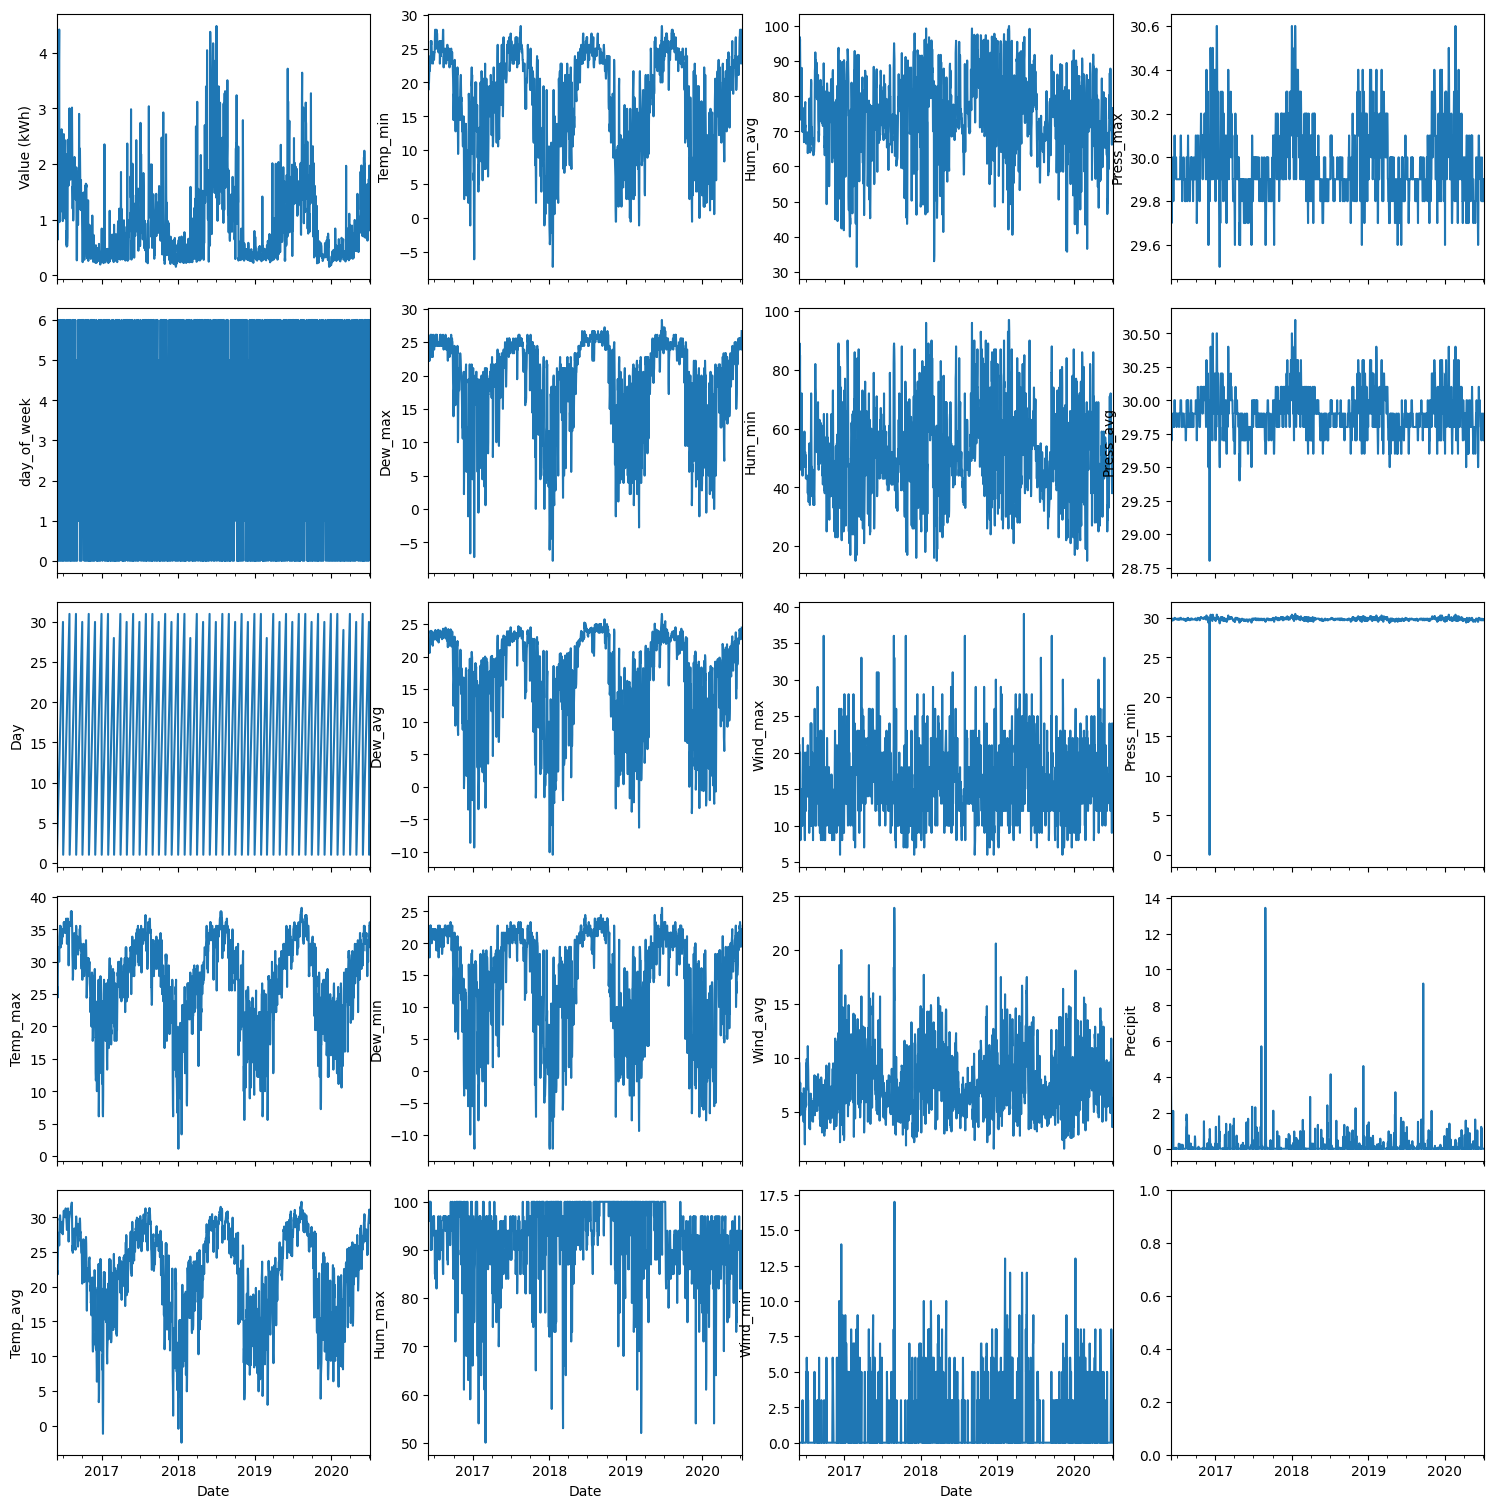

In [102]:
fig, axis = plt.subplots(5, 4, figsize=(15, 15), sharex=True)
fig.tight_layout()
for i, num_col in enumerate(num_columns):
    row = i % 5
    col = i // 5
    data.plot(y=[num_col], ax=axis[row][col], xlabel=None, ylabel=num_col, legend=None)

Temperature, pressure, dew point and wind speed have a similar periodic structure. the period depends on the season

In [103]:
corr = data.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

,Value (kWh),day_of_week,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit
Value (kWh),1.000000,0.017829,-0.040117,0.602765,0.617767,0.610625,0.544454,0.558716,0.560434,0.123055,0.024436,-0.020046,0.026023,-0.133414,-0.104931,-0.341108,-0.268236,-0.029498,-0.008986
day_of_week,0.017829,1.000000,-0.002588,0.020255,0.019368,0.017839,0.020858,0.017325,0.009499,-0.001444,-0.000932,-0.003558,0.009471,0.003540,-0.030861,-0.008365,-0.020566,0.021412,-0.003220
Day,-0.040117,-0.002588,1.000000,0.005967,0.000755,-0.001977,0.002429,-0.000676,-0.006322,-0.003976,-0.005951,-0.017581,0.070071,0.048668,0.019761,-0.041066,-0.029535,0.026205,0.027902
Temp_max,0.602765,0.020255,0.005967,1.000000,0.970671,0.896819,0.853261,0.863508,0.834735,0.198014,0.009409,-0.115138,-0.017668,-0.233705,-0.222661,-0.641610,-0.538695,-0.041621,-0.034092
Temp_avg,0.617767,0.019368,0.000755,0.970671,1.000000,0.964856,0.907404,0.927545,0.902473,0.217103,0.105836,0.032589,0.029039,-0.142861,-0.135562,-0.681656,-0.577216,-0.065150,0.001527
Temp_min,0.610625,0.017839,-0.001977,0.896819,0.964856,1.000000,0.899193,0.937564,0.940381,0.221901,0.211626,0.165240,0.060535,-0.071067,-0.044836,-0.677092,-0.563582,-0.077089,0.045736
Dew_max,0.544454,0.020858,0.002429,0.853261,0.907404,0.899193,1.000000,0.970852,0.904039,0.489682,0.443943,0.334323,0.133957,-0.050420,-0.090190,-0.700926,-0.633840,-0.091189,0.075256
Dew_avg,0.558716,0.017325,-0.000676,0.863508,0.927545,0.937564,0.970852,1.000000,0.968535,0.470792,0.466556,0.365303,0.078595,-0.094989,-0.092529,-0.711440,-0.619705,-0.091366,0.073098
Dew_min,0.560434,0.009499,-0.006322,0.834735,0.902473,0.940381,0.904039,0.968535,1.000000,0.415608,0.437150,0.363220,0.026391,-0.126508,-0.090757,-0.682932,-0.560050,-0.085538,0.078316
Hum_max,0.123055,-0.001444,-0.003976,0.198014,0.217103,0.221901,0.489682,0.470792,0.415608,1.000000,0.763141,0.511610,-0.011091,-0.176681,-0.197516,-0.306529,-0.305726,-0.081099,0.124446


In [104]:
data.groupby("notes")[["Value (kWh)"]].mean()

,Value (kWh)
notes,
COVID_lockdown,0.885010
vacation,0.488231
weekday,0.979304
weekend,0.977197


The value of energy consumption (kWh) is most strongly correlated with temperature (C)
The temperature, in turn, correlates with the dew point value with a corr coefficient of ~0.9, which indicates a strong dependence of these parameters

In [107]:
corr_row = corr["Value (kWh)"].replace(1, 0)
(feature := corr_row.idxmax())

'Temp_avg'

The most important feature is **Temp_avg**

In [108]:
data.to_csv(PATH / "prepared_data.csv")